# Principal Component Analysis

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
dataset=pd.read_csv("E:\Iris\Iris.csv")
dataset.dropna(how="all", inplace=True)
X = dataset.iloc[:, 1:5].values

## Original Iris.csv data

In [2]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Shape of data: X

In [11]:
X.shape

(150, 4)

## Standardising Data

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Covariance Matrix

In [5]:
import numpy as np
cov_mat=np.cov(X_std.T) #Covariance matrix.

In [6]:
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Eigen vector Decomposition

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat) #Eigen decomposition on cov_mat

In [8]:
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [9]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

In [11]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0]) 

Eigenvalues in descending order:
2.9303537755893174
0.9274036215173421
0.14834222648163944
0.020746013995595943


### How many principal components are we going to choose for our new feature subspace?

In [13]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] #explained variance
var_exp

[72.77045209380134, 23.03052326768065, 3.6838319576273775, 0.5151926808906323]

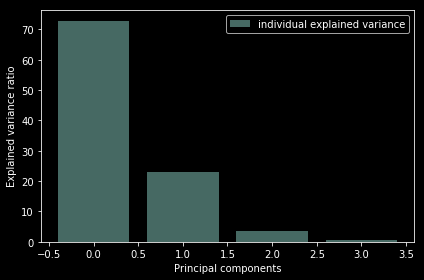

In [14]:
import matplotlib.pyplot as plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# Using sklearn

In [23]:
from sklearn.model_selection import train_test_split
y = dataset['Species'] 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)  

In [24]:
pca = PCA()  
X_tr=pca.fit_transform(X_train)  
X_te = pca.transform(X_test)  

In [25]:
explained_variance = pca.explained_variance_ratio_ 

In [26]:
explained_variance

array([0.72790474, 0.23357964, 0.03390157, 0.00461406])